In [24]:
%matplotlib inline

In [1]:
#(1) Import des packages
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import missingno as msno

In [2]:
lieux = pd.read_csv('lieux11.csv')
lieux.head(10)

,Unnamed: 0.1,Unnamed: 0,num_acc,catr,circ,prof,plan,surf,infra,situ,annee
0,0,1,200500000001,3-Route Départementale,Bidirectionnelle(2),Plat(1),Partie rectiligne(1),Normale(1),Aucun(0),Sur chaussée(1),2005-01-01
1,1,2,200500000002,2-Route nationale,Non renseigné(-1),Plat(1),Partie rectiligne(1),Normale(1),Aucun(0),Sur piste cyclable(5),2005-01-01
2,2,3,200500000003,2-Route nationale,Non renseigné(-1),Plat(1),Partie rectiligne(1),Mouillée(2),Aucun(0),Sur piste cyclable(5),2005-01-01
3,3,4,200500000004,3-Route Départementale,Bidirectionnelle(2),Plat(1),Partie rectiligne(1),Normale(1),Aucun(0),Sur chaussée(1),2005-01-01
4,4,5,200500000005,3-Route Départementale,Bidirectionnelle(2),Plat(1),En courbe à droite(3),Mouillée(2),Aucun(0),Sur accotement(3),2005-01-01
5,5,6,200500000006,3-Route Départementale,Bidirectionnelle(2),Plat(1),En courbe à droite(3),Mouillée(2),Aucun(0),Sur piste cyclable(5),2005-01-01
6,6,7,200500000007,3-Route Départementale,Bidirectionnelle(2),Plat(1),Partie rectiligne(1),Normale(1),Aucun(0),Sur chaussée(1),2005-01-01
7,7,8,200500000008,3-Route Départementale,Bidirectionnelle(2),Plat(1),En courbe à droite(3),Normale(1),Aucun(0),Sur accotement(3),2005-01-01
8,8,9,200500000009,3-Route Départementale,Bidirectionnelle(2),Non renseigné(-1),Partie rectiligne(1),Normale(1),Aucun(0),Sur chaussée(1),2005-01-01
9,9,10,200500000010,2-Route nationale,Non renseigné(-1),Plat(1),Partie rectiligne(1),Mouillée(2),Aucun(0),Sur chaussée(1),2005-01-01


In [3]:
lieux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010689 entries, 0 to 1010688
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0.1  1010689 non-null  int64 
 1   Unnamed: 0    1010689 non-null  int64 
 2   num_acc       1010689 non-null  int64 
 3   catr          1010689 non-null  object
 4   circ          1010689 non-null  object
 5   prof          1010689 non-null  object
 6   plan          1010689 non-null  object
 7   surf          1010689 non-null  object
 8   infra         1010689 non-null  object
 9   situ          1010689 non-null  object
 10  annee         1010689 non-null  object
dtypes: int64(3), object(8)
memory usage: 84.8+ MB


In [5]:
usagers = pd.read_csv('usag6.csv', low_memory=False)
usagers.head(10)

,Unnamed: 0.1,Unnamed: 0,num_acc,place,catu,grav,sexe,trajet,an_nais,num_veh,...,locpLabel,etatpLabel,an_naiss,age_acc,age_acc_seconds,secuUn,secuDeux,secuUnLabel,secuDeuxLabel,secu3Label
0,0,1,2.005000e+11,1.0,1,4,1,1.0,1976-01-01,A01,...,Sans objet(0),Non renseigné,1976-01-01,10593 days,9.152352e+08,1.0,1.0,Ceinture(1),Ceinture(1),NaN
1,1,2,2.005000e+11,1.0,1,3,2,3.0,1968-01-01,B02,...,Sans objet(0),Non renseigné,1968-01-01,13515 days,1.167696e+09,1.0,1.0,Ceinture(1),Ceinture(1),NaN
2,2,3,2.005000e+11,2.0,2,1,1,0.0,1964-01-01,B02,...,Sans objet(0),Non renseigné,1964-01-01,14976 days,1.293926e+09,1.0,1.0,Ceinture(1),Ceinture(1),NaN
3,3,4,2.005000e+11,4.0,2,1,1,0.0,2004-01-01,B02,...,Sans objet(0),Non renseigné,2004-01-01,366 days,3.162240e+07,3.0,1.0,Dispositif enfants(3),Ceinture(1),NaN
4,4,5,2.005000e+11,5.0,2,1,1,0.0,1998-01-01,B02,...,Sans objet(0),Non renseigné,1998-01-01,2557 days,2.209248e+08,1.0,1.0,Ceinture(1),Ceinture(1),NaN
5,5,6,2.005000e+11,3.0,2,1,2,0.0,1991-01-01,B02,...,Sans objet(0),Non renseigné,1991-01-01,5114 days,4.418496e+08,1.0,1.0,Ceinture(1),Ceinture(1),NaN
6,6,7,2.005000e+11,1.0,1,1,1,5.0,1955-01-01,A01,...,Sans objet(0),Non renseigné,1955-01-01,18263 days,1.577923e+09,1.0,1.0,Ceinture(1),Ceinture(1),NaN
7,7,8,2.005000e+11,1.0,1,3,1,5.0,1979-01-01,B02,...,Sans objet(0),Non renseigné,1979-01-01,9497 days,8.205408e+08,2.0,1.0,Casque(2),Ceinture(1),NaN
8,8,9,2.005000e+11,1.0,1,1,1,1.0,1983-01-01,A01,...,Sans objet(0),Non renseigné,1983-01-01,8036 days,6.943104e+08,2.0,1.0,Casque(2),Ceinture(1),NaN
9,9,10,2.005000e+11,1.0,1,3,1,1.0,1956-01-01,B02,...,Sans objet(0),Non renseigné,1956-01-01,17898 days,1.546387e+09,2.0,1.0,Casque(2),Ceinture(1),NaN


In [6]:
usagers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509620 entries, 0 to 2509619
Data columns (total 27 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0.1     int64  
 1   Unnamed: 0       int64  
 2   num_acc          float64
 3   place            float64
 4   catu             int64  
 5   grav             int64  
 6   sexe             int64  
 7   trajet           float64
 8   an_nais          object 
 9   num_veh          object 
 10  annee            object 
 11  secu1            float64
 12  secu2            float64
 13  catuLabel        object 
 14  gravLabel        object 
 15  sexeLabel        object 
 16  trajetLabel      object 
 17  locpLabel        object 
 18  etatpLabel       object 
 19  an_naiss         object 
 20  age_acc          object 
 21  age_acc_seconds  float64
 22  secuUn           float64
 23  secuDeux         float64
 24  secuUnLabel      object 
 25  secuDeuxLabel    object 
 26  secu3Label       object 
dtypes: float64(8

In [7]:
usagLieux = usagers.merge(lieux, how='inner', on='num_acc')
usagLieux.head()

,Unnamed: 0.1_x,Unnamed: 0_x,num_acc,place,catu,grav,sexe,trajet,an_nais,num_veh,...,Unnamed: 0.1_y,Unnamed: 0_y,catr,circ,prof,plan,surf,infra,situ,annee_y
0,0,1,2.005000e+11,1.0,1,4,1,1.0,1976-01-01,A01,...,0,1,3-Route Départementale,Bidirectionnelle(2),Plat(1),Partie rectiligne(1),Normale(1),Aucun(0),Sur chaussée(1),2005-01-01
1,1,2,2.005000e+11,1.0,1,3,2,3.0,1968-01-01,B02,...,0,1,3-Route Départementale,Bidirectionnelle(2),Plat(1),Partie rectiligne(1),Normale(1),Aucun(0),Sur chaussée(1),2005-01-01
2,2,3,2.005000e+11,2.0,2,1,1,0.0,1964-01-01,B02,...,0,1,3-Route Départementale,Bidirectionnelle(2),Plat(1),Partie rectiligne(1),Normale(1),Aucun(0),Sur chaussée(1),2005-01-01
3,3,4,2.005000e+11,4.0,2,1,1,0.0,2004-01-01,B02,...,0,1,3-Route Départementale,Bidirectionnelle(2),Plat(1),Partie rectiligne(1),Normale(1),Aucun(0),Sur chaussée(1),2005-01-01
4,4,5,2.005000e+11,5.0,2,1,1,0.0,1998-01-01,B02,...,0,1,3-Route Départementale,Bidirectionnelle(2),Plat(1),Partie rectiligne(1),Normale(1),Aucun(0),Sur chaussée(1),2005-01-01


In [8]:
usagLieux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169440 entries, 0 to 2169439
Data columns (total 37 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0.1_x   int64  
 1   Unnamed: 0_x     int64  
 2   num_acc          float64
 3   place            float64
 4   catu             int64  
 5   grav             int64  
 6   sexe             int64  
 7   trajet           float64
 8   an_nais          object 
 9   num_veh          object 
 10  annee_x          object 
 11  secu1            float64
 12  secu2            float64
 13  catuLabel        object 
 14  gravLabel        object 
 15  sexeLabel        object 
 16  trajetLabel      object 
 17  locpLabel        object 
 18  etatpLabel       object 
 19  an_naiss         object 
 20  age_acc          object 
 21  age_acc_seconds  float64
 22  secuUn           float64
 23  secuDeux         float64
 24  secuUnLabel      object 
 25  secuDeuxLabel    object 
 26  secu3Label       object 
 27  Unnamed: 0.1

<Figure size 2000x2000 with 0 Axes>

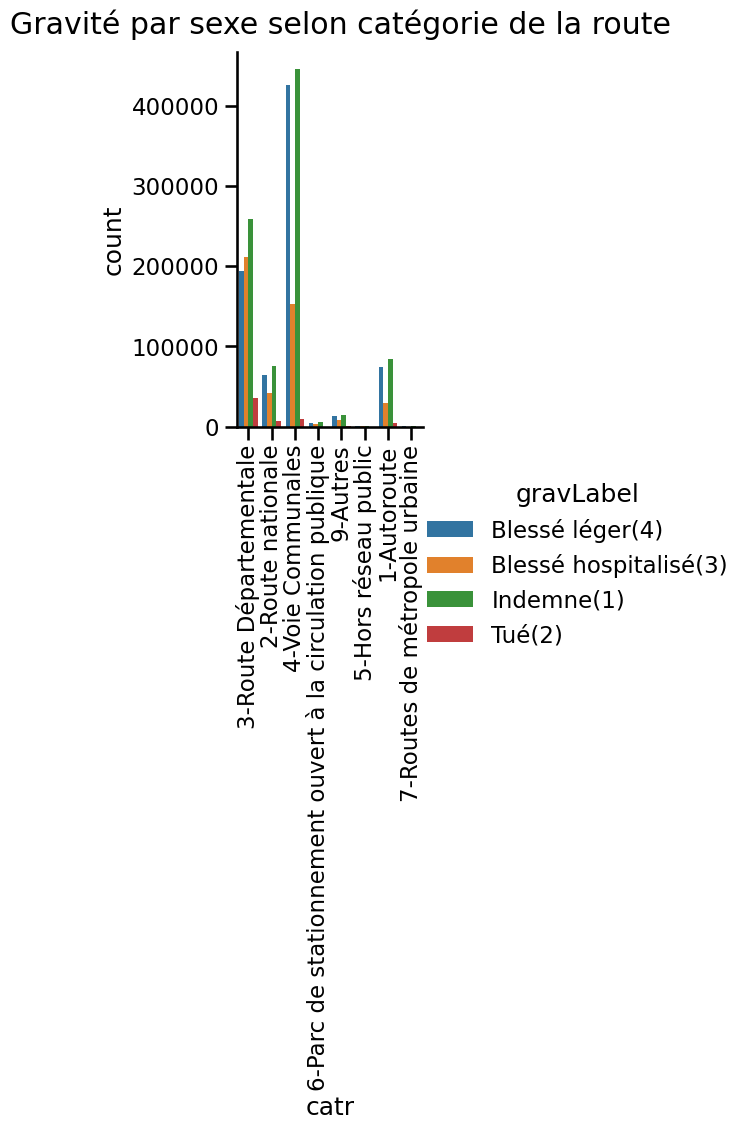

In [18]:
sns.set_context("talk")
plt.figure(figsize=(20, 20))
g = sns.catplot(data=usagLieux, x="catr", hue='gravLabel', kind='count')
g.fig.suptitle("Gravité par sexe selon catégorie de la route", y=1.03)
#g.set(xlabel="Catégorie de route", ylabel="Compte")
g.set_titles("{col_name} {col_var}")

plt.xticks(rotation='vertical')
plt.show();

In [36]:
sns.set("talk")

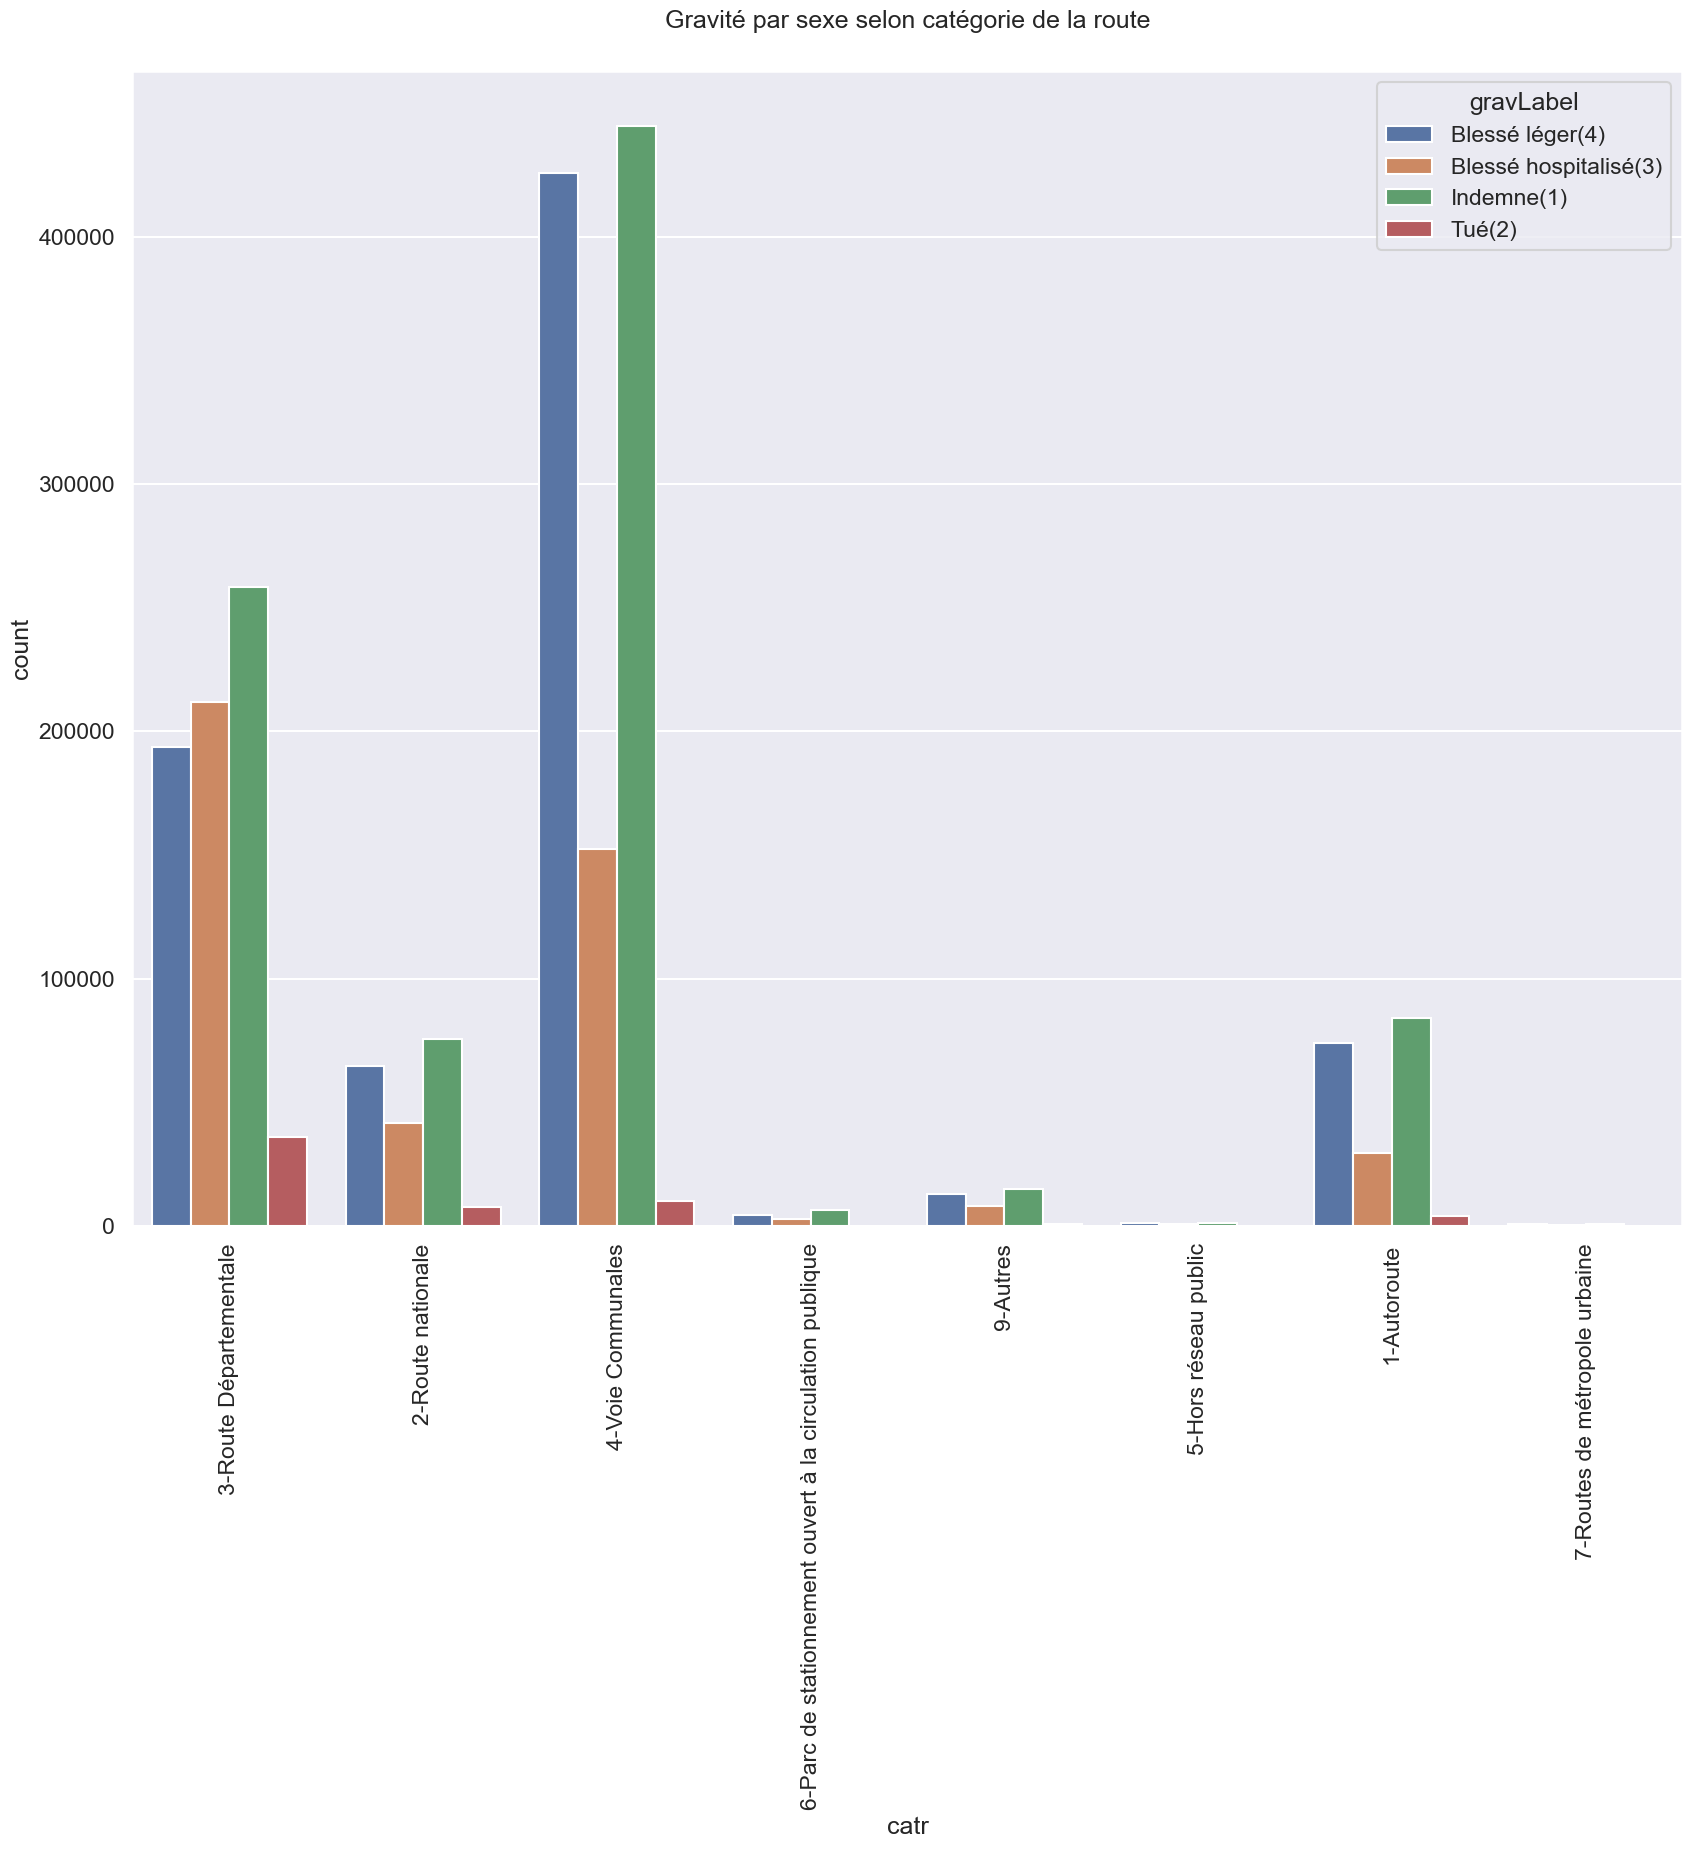

In [37]:
plt.figure(figsize=(20, 15))

sns.countplot(data=usagLieux, x="catr", hue='gravLabel')
plt.title("Gravité par sexe selon catégorie de la route", y=1.03)


plt.xticks(rotation='vertical');

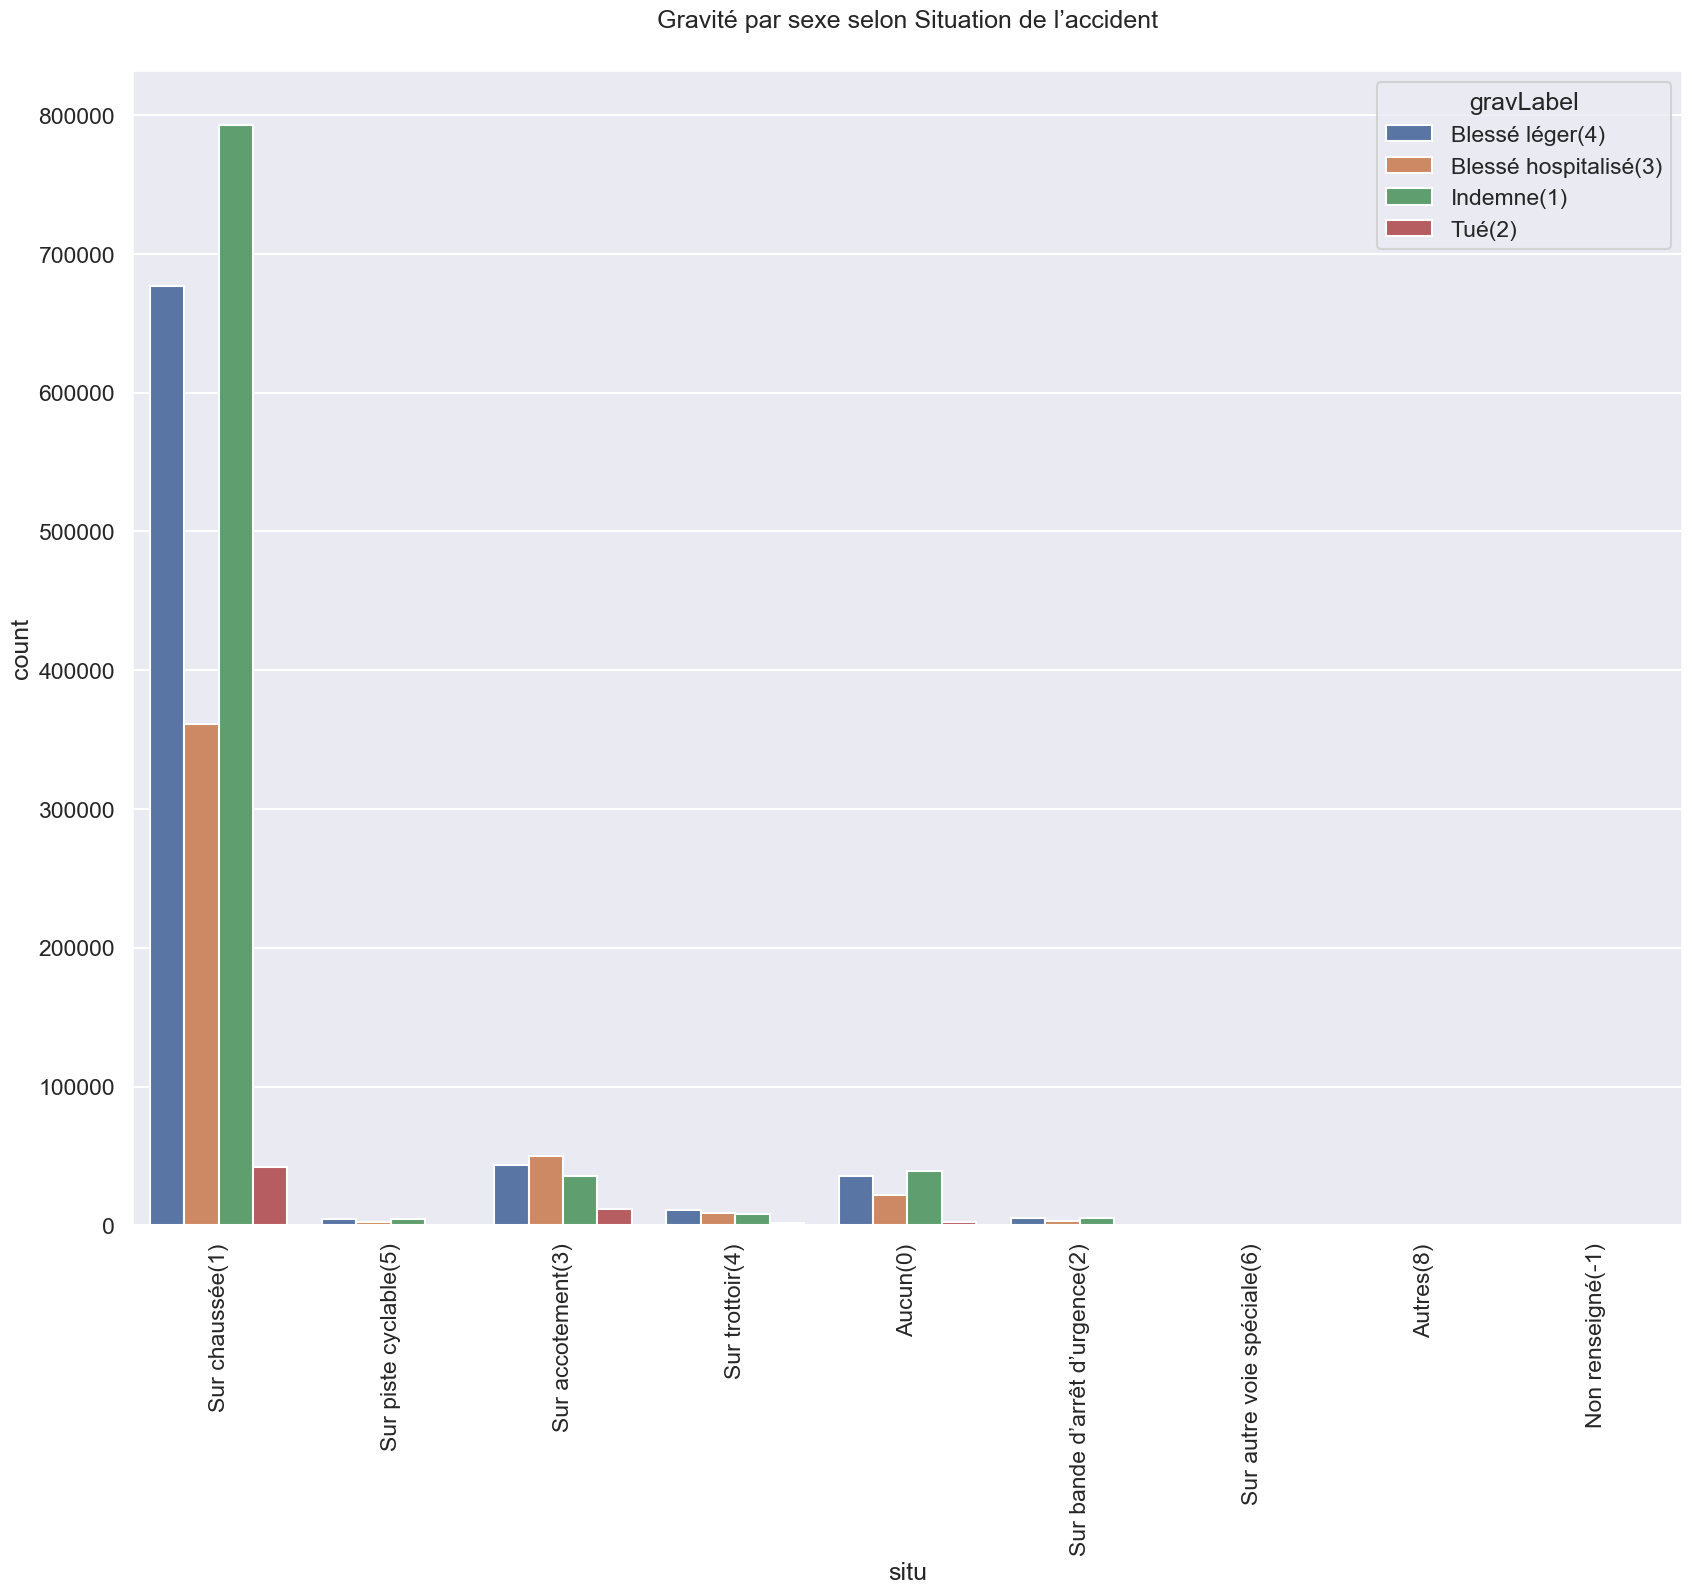

In [40]:
plt.figure(figsize=(20, 15))

sns.countplot(data=usagLieux, x="situ", hue='gravLabel')
plt.title("Gravité par sexe selon Situation de l’accident", y=1.03)


plt.xticks(rotation='vertical');

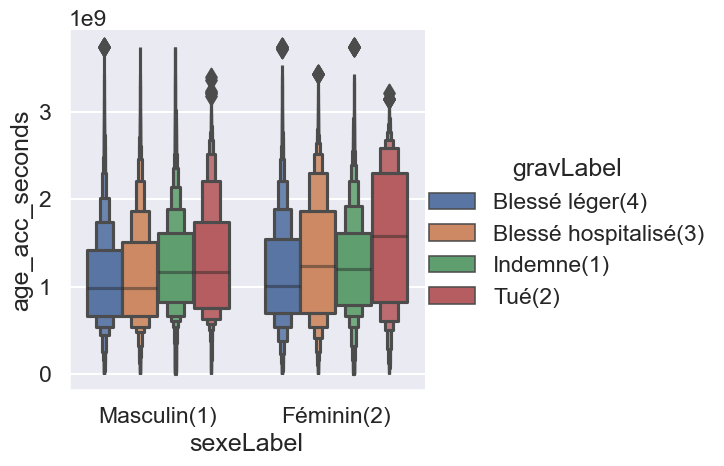

In [43]:
sns.catplot(data=usagLieux, y="age_acc_seconds", x="sexeLabel", hue="gravLabel", kind="boxen")